##Importando as bibliotecas

In [ ]:
!pip install -U kaleido
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import ttest_rel
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV


#Descrição da base de dados:

*   **Address:** endereço dos imóveis
*   **Adm-fess :** taxa de condomínio dos imóveis


*   **Garage-places:** número de vagas de garagem
*   **Price:** A variável alvo dessa análise. É referente ao preço dos imóveis.


*   **Rooms:** Número de quartos dos imóveis.


*   **City:** Cidade em que o imóvel é pertencente
*   **Latitude e Longitude:** local em coordenadas onde o imóvel se localiza.

*   **Zones:**: Região administrativa que pertence o imóvel.




##Importando a base de dados

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/base_de_dados/House_Pricing_BH/dados_tratados.csv')

In [ ]:
data.describe()

,garage-places,price,rooms,square-foot,latitude,longitude
count,5367.000000,5.367000e+03,5367.000000,5367.000000,5367.000000,5367.000000
mean,2.228433,1.019017e+06,3.101081,152.091764,-19.909338,-43.932369
std,1.637102,1.065995e+06,1.216915,158.302204,0.112464,0.236034
min,0.000000,9.500000e+04,1.000000,14.000000,-20.381093,-46.507540
25%,1.000000,4.200000e+05,2.000000,75.000000,-19.947535,-43.968356
50%,2.000000,6.900000e+05,3.000000,110.000000,-19.929576,-43.945070
75%,3.000000,1.200000e+06,4.000000,175.000000,-19.895202,-43.930510
max,50.000000,1.199000e+07,50.000000,4000.000000,-17.373120,-41.121777


#Análise gráfica

Como podemos observar, todas as variáveis quantitativas apresentam distruição assimétrica a direita. Dentre essas a variável dependente "price".

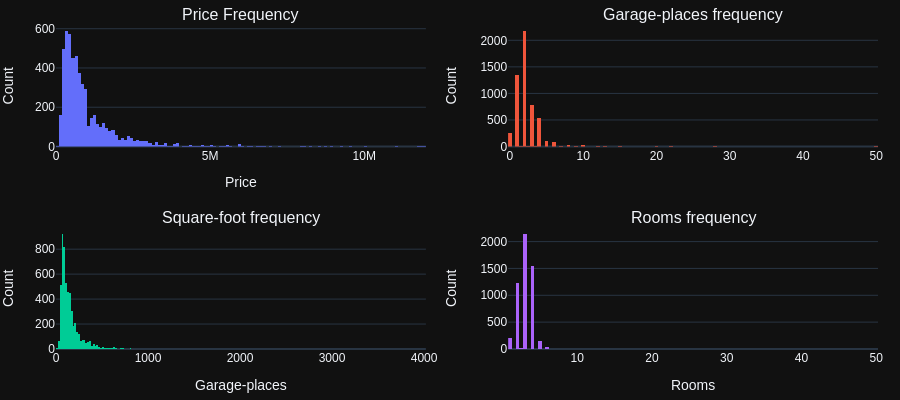

In [ ]:
fig = make_subplots(rows=2, cols=2, column_widths=[0.3, 0.3], row_heights=[0.3, 0.3], subplot_titles = ['Price Frequency', 'Garage-places frequency', 'Square-foot frequency', 'Rooms frequency'])
fig.add_trace(go.Histogram(x = data['price']), row=1, col=1)
fig.add_trace(go.Histogram(x = data['garage-places']), row=1, col=2)
fig.add_trace(go.Histogram(x = data['square-foot']), row=2, col=1)
fig.add_trace(go.Histogram(x = data['rooms']), row=2, col=2)
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=2)
fig.update_yaxes(title_text="Count", row=2, col=1)
fig.update_yaxes(title_text="Count", row=2, col=2)
fig.update_xaxes(title_text="Price", row=1, col=1)
fig.update_xaxes(title_text="Square-foot", row=2, col=1)
fig.update_xaxes(title_text="Garage-places", row=2, col=1)
fig.update_xaxes(title_text="Rooms", row=2, col=2)
fig.update_layout(showlegend=False, height=400, template="plotly_dark", margin=dict(r=10, t=25, b=40, l=50), width = 900)
fig.show('png')

Pelo box plot abaixo, pode-se ver que essa assimétrica na distribuição do preço também é apresentada em todas as zonas da cidade.

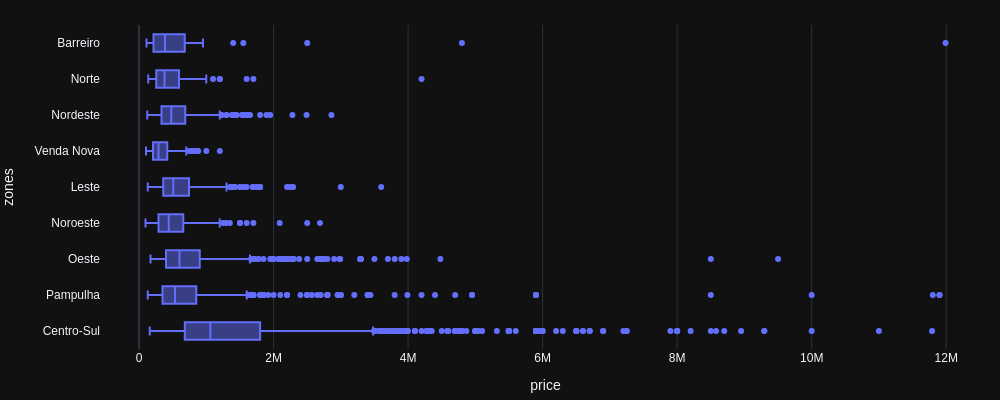

In [ ]:
fig = px.box(data_frame = data, x = 'price', y ='zones')
fig.update_layout(showlegend=False, height=400, template="plotly_dark", margin=dict(r=10, t=25, b=40, l=50), width = 1000)
fig.show('png')

Como se trata de uma distribuição não simétrica ou não normalizada das variáveis quantitativas, foi escolhida a mediana como medida de tendência central para análise.

In [ ]:
zone_count = data.groupby('zones').zones.count().sort_values()
zones_price_median = data.groupby('zones').price.median().sort_values()
zones_median_squarefoot =  data.groupby('zones')['square-foot'].median().sort_values()
zones_mean_room = data.groupby('zones')['rooms'].median().sort_values()
zones_garagem_mean = data.groupby('zones')['garage-places'].median().sort_values()



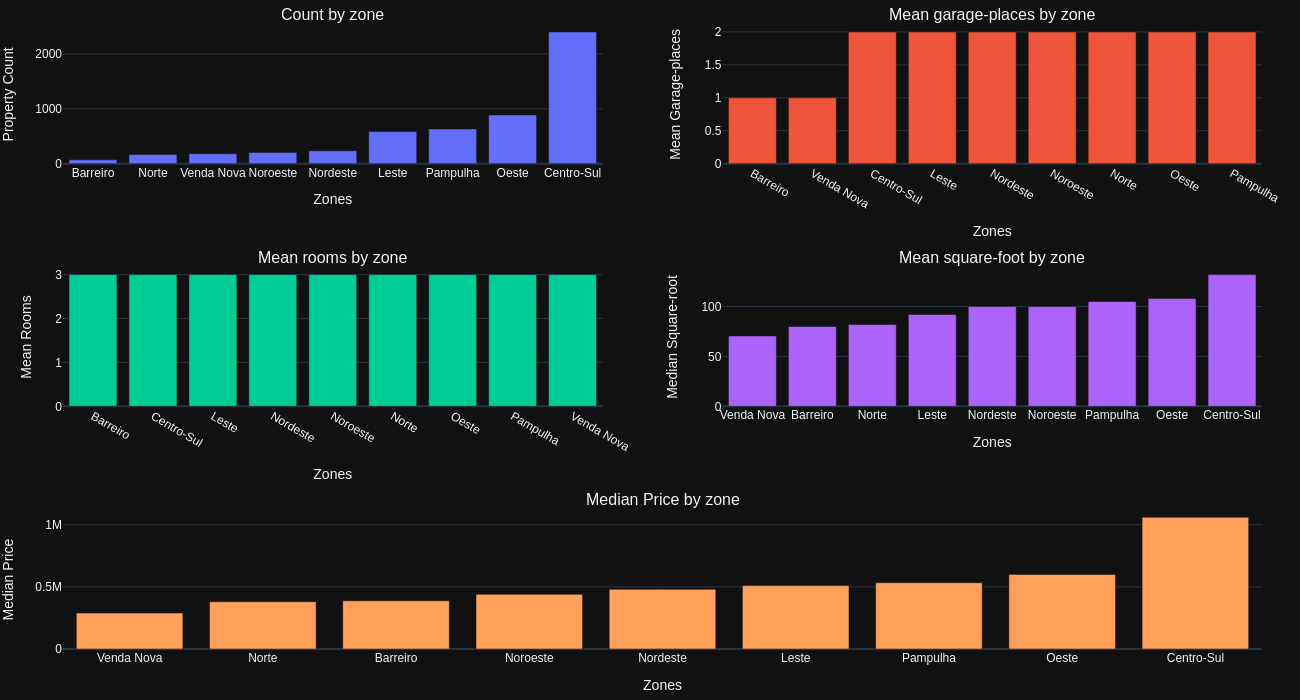

In [ ]:
fig = make_subplots(rows=3, cols=2, column_widths=[0.3, 0.3], row_heights=[0.3, 0.3, 0.3],
     specs=[[{}, {}],
           [{}, {}],
           [{'colspan' : 2}, None]], subplot_titles= ['Count by zone', 'Mean garage-places by zone', 'Mean rooms by zone', 'Mean square-foot by zone', 'Median Price by zone'])
fig.add_trace(go.Bar(x = zone_count.index, y = zone_count.values, name = 'Count by zone'), row=1, col=1)
fig.add_trace(go.Bar(x = zones_garagem_mean.index, y = zones_garagem_mean.values, name = 'Mean garage-places by zone'), row=1, col=2)
fig.add_trace(go.Bar(x = zones_mean_room.index, y = zones_mean_room.values, name = 'Mean rooms by zone'),row=2, col=1)
fig.add_trace(go.Bar(x = zones_median_squarefoot.index, y = zones_median_squarefoot.values, name = 'Mean square-foot by zone'),row=2, col=2)
fig.add_trace(go.Bar(x = zones_price_median.index, y = zones_price_median.values, name = 'Median Price by zone'),row=3, col=1)
fig.update_yaxes(title_text="Property Count", row=1, col=1)
fig.update_yaxes(title_text="Mean Garage-places", row=1, col=2)
fig.update_yaxes(title_text="Median Square-root", row=2, col=2)
fig.update_yaxes(title_text="Mean Rooms", row=2, col=1)
fig.update_yaxes(title_text="Median Price", row=3, col=1)
fig.update_xaxes(title_text="Zones", row=1, col=1)
fig.update_xaxes(title_text="Zones", row=1, col=2)
fig.update_xaxes(title_text="Zones", row=2, col=1)
fig.update_xaxes(title_text="Zones", row=2, col=2)
fig.update_xaxes(title_text="Zones", row=3, col=1)
fig.update_layout(showlegend=False, height=700, template="plotly_dark", margin=dict(r=10, t=25, b=40, l=50), width = 1300)

fig.show(fig.show('png'))

**Obvervações ao analisar os gráficos:**


*   Como se pode observar pelo gráfico 'Count by Zone', a base de dados não apresenta uma distribuição homogênea entre as zonas, sendo a Centro-Sul com um volume amostral muito maior que as demais.
*   A zona Centro-Sul apresenta grande diferença no preço dos imóveis (praticamente o dobro), área e número de banheiros quando comparada com as outras.
*   Venda Nova apresenta os piores valores da cidade em todas as variáveis desta análise gráfica.
*   Centro-Sul apenas não lidera no número de lugares de garagem, pois a Pampulha tem uma melhor média.





#Análise estatística da distribuição de frequência da variável observável 'price'.

In [ ]:
def test_normal(array, alpha, test):
  if test == kstest:
    stat_test, p_valor = kstest(array, 'norm')
    alpha = 0.05
    if p_valor < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected. It's not a normal distribution")
    else:
        print("The null hypothesis cannot be rejected. It's a normal distribution")
  else:
    stat_test, p_valor =shapiro(resultRf)
    alpha = 0.05
    if p_valor < alpha:  # null hypothesis: x comes from a normal distribution
      print("The null hypothesis can be rejected. It's not a normal distribution")
    else:
      print("The null hypothesis cannot be rejected. It's a normal distribution")


Para efetuar os testes de hipótese de normalidade dessa análise, foi criada a função abaixo utilizando " Kolmogorov-Smirnov" e "Shapiro-Wilk". Cada uma para ser utilizada para uma dada quantidade de dados.
Para o teste de normalidade da variável texto foi escolhido o primeiro, pois é o mais recomendável para amostrar maiores.

Foi utilizado o teste de normalidade 'Kolmogorov-Smirnov' para concluir estatisticamente que não se trata de uma distribuição normal.

In [ ]:
test_normal(data.price, alpha = 0.05, test = kstest)

The null hypothesis can be rejected. It's not a normal distribution


##Preparação dos dados e transformação logarítmica

Uma das maneiras de normalizar os dados para que alguns dos modelos de machine learning tenham uma precisão maior é a transformação logarítma. Mas antes disso precisamos selecionar as variáveis que vão ser usadas no modelo.
Foi retirada as colunas 'address', 'city', 'neighborhood' devida ao alto grau de detalhamento e complexidade.


In [ ]:
data = data.drop(['address', 'city', 'neighborhood'], axis = 1)

A grande maioria dos algoritmos de machine learning necessita da vetorização dos dados qualitativos ou categóricos. Para isso foi utilizado a classe OneHotEnconded da biblioteca Scikit-learn.

In [ ]:
one_hot_enc = make_column_transformer(
    (OneHotEncoder(), ['zones']),
    remainder='passthrough', verbose_feature_names_out=False)

zones_code = one_hot_enc.fit_transform(data)


In [ ]:
new_data = pd.DataFrame(
    zones_code, 
    columns=one_hot_enc.get_feature_names_out()
)

In [ ]:
new_data.head()

,zones_Barreiro,zones_Centro-Sul,zones_Leste,zones_Nordeste,zones_Noroeste,zones_Norte,zones_Oeste,zones_Pampulha,zones_Venda Nova,garage-places,price,rooms,square-foot,latitude,longitude
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,330000.0,1.0,40.0,-19.936415,-43.953396
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,480000.0,2.0,55.0,-18.864776,-41.121777
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,1190000.0,4.0,411.0,-20.225241,-44.397780
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1590000.0,4.0,158.0,-19.937155,-43.958694
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,550000.0,3.0,278.0,-19.912982,-44.019944


Após tentativas (que não estão presentes nesse notebook) com StandardScaler() e MinMaxScaler() ambos da biblioteca Scikit Learn, a transformação que trouxe o melhor retorno foram radians() para "latitude" e "longitude" e log() para restante, ambas da biblioteca Numpy. Essas transformações foram feitas separadas, pois "latitude" e "longitude" possuem números negativos e não é possível efetuar transformação logaritma nesses números.

In [ ]:
final_data = new_data.copy()

In [ ]:
final_data.loc[:, 'latitude'] = np.radians(new_data.latitude).values
final_data.loc[:, 'longitude'] = np.radians(new_data.longitude).values

In [ ]:
final_data.loc[:, 'price'] = np.log(new_data.price).values
final_data.rename({'price': 'log_price'})


,zones_Barreiro,zones_Centro-Sul,zones_Leste,zones_Nordeste,zones_Noroeste,zones_Norte,zones_Oeste,zones_Pampulha,zones_Venda Nova,garage-places,price,rooms,square-foot,latitude,longitude
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.706848,1.0,40.0,-0.347956,-0.767131
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.081541,2.0,55.0,-0.329252,-0.717710
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,13.989464,4.0,411.0,-0.352997,-0.774887
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,14.279245,4.0,158.0,-0.347969,-0.767224
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,13.217674,3.0,278.0,-0.347547,-0.768293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5362,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12.301383,1.0,45.0,-0.348620,-0.767556
5363,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,13.235692,3.0,92.0,-0.348113,-0.767439
5364,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.994530,3.0,90.0,-0.348715,-0.768399
5365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,13.122363,3.0,80.0,-0.346289,-0.767178


In [ ]:
final_data.rename({'price': 'log_price'}, axis = 1, inplace = True)

Com os dados transformados, podemos observar como se comporta a distribuição de frequência dos preços.

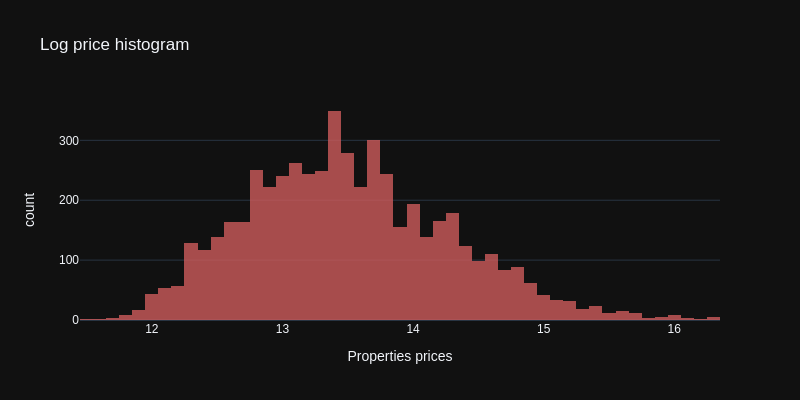

In [ ]:
fig = px.histogram(final_data.log_price, title = 'Log price histogram', color_discrete_sequence=['indianred'], opacity=0.8, labels ={'value' : 'Properties prices'})
fig.update_layout(showlegend=False, template="plotly_dark", height = 400, width = 800)
fig.show('png')


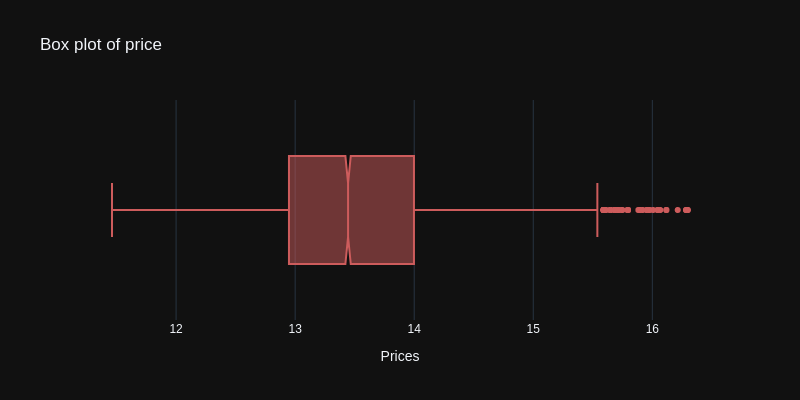

In [ ]:
fig = px.box(x = final_data.log_price, notched=True, title="Box plot of price", labels = {'x' : 'Prices'}, color_discrete_sequence=['indianred'])
fig.update_layout(showlegend=False, template="plotly_dark", height = 400, width = 800)
fig.show('png')

##Regressão Linear

Como podemos observar na matriz de correção, não há nenhuma correlação forte entre as variáveis independentes. Por por enquanto não há necessidade de retirar nenhuma a mais.

<AxesSubplot:>

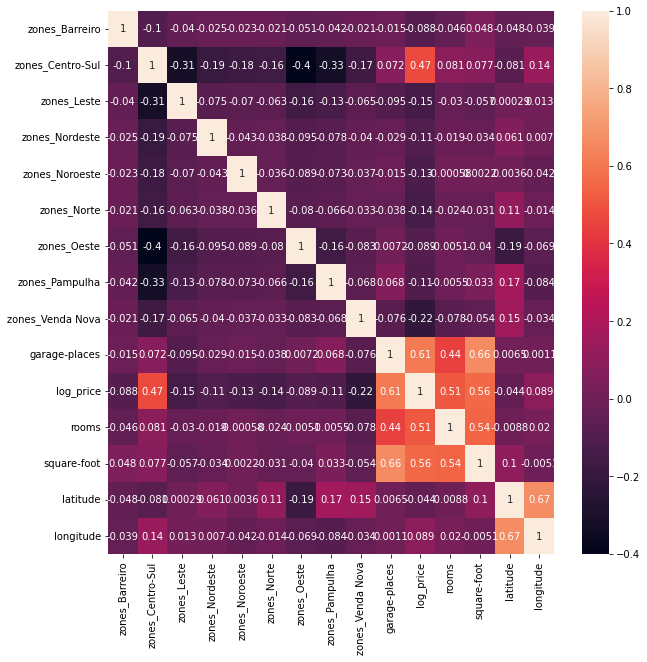

In [ ]:
matriz_correlation = final_data.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(matriz_correlation, annot = True)

Dividindo a base de dados entre treino e teste:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_data.drop('log_price', axis = 1), final_data.log_price, test_size = 0.2, random_state = 123)

In [ ]:
X_train_with_constant = sm.add_constant(X_train)
X_train_with_constant

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,const,zones_Barreiro,zones_Centro-Sul,zones_Leste,zones_Nordeste,zones_Noroeste,zones_Norte,zones_Oeste,zones_Pampulha,zones_Venda Nova,garage-places,rooms,square-foot,latitude,longitude
4221,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,62.0,-0.348000,-0.767653
3720,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,186.0,-0.348072,-0.766446
5256,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,46.0,-0.347639,-0.767032
5069,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,118.0,-0.347837,-0.767062
1131,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,85.0,-0.344818,-0.767808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,147.0,-0.347334,-0.766519
1899,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,67.0,-0.348142,-0.767108
3360,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,59.0,-0.346138,-0.767820
2422,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,250.0,-0.347579,-0.766877


In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_with_constant, hasconst = True).fit()

O primeiro método utilizado para uma melhor análise é a regressão linear do Statsmodels. É bastante útil para ter várias informações estatisticas sumarizadas.

In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     566.4
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:39:01   Log-Likelihood:                -2847.3
No. Observations:                4293   AIC:                             5723.
Df Residuals:                    4279   BIC:                             5812.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.8094      1.350  

Analisando os resultados estatísticos, vemos que todas as variáveis, são estatiscamente relevantes para o modelo de regressão linear, com p-values menores que 0.05.

#Nested Cross Validation
O método utilizado para a validação do modelo foi o **"Nested Cross Validation"**, que consiste em separar a base de treinamento para a seleção do melhor modelo e hyperparâmetros. Nesse caso, utilizamos a base de teste apenas para a validação do modelo. Dessa maneira garantimos que os dados que estão sendo usados para a validação final, não foram utilizados em momento algum no treinamento, tendo assim uma avaliação mais realista do modelo criado.  
Foram escolhidas as seguintes classes para a criação do modelo de regressão:

*   Linear Regression
*   Random Forest Regressor
*   Gradient Boosting Regressor
*   KNeighbors Regressor
*   Support Vector Regression













Foi criada a função 'crossValidation' para realizar os testes e comparar os modelos. Os scores escolhidos para a análise foram 'R^2' e 'RMSE'.

Dentro desta função utilizei para padronização dos dados o "StandardScaler" da biblioteca Scikit-learn.

In [ ]:
def crossValidation(model, score1, score2, X, Y , n_splits):
  
  scaler = StandardScaler()
  pipeline =  Pipeline([('transformation', scaler), ('estimador', model)])
  cv = KFold(n_splits= 5, shuffle = True)
  score = cross_validate(pipeline, X, Y, cv=cv, scoring=[f'{score1}', f'{score2}'])
  R2= score[f'test_{score1}']
  RMSE = score[f'test_{score2}']
  print(f'{model}:')
  print(f'Mean R2: {R2.mean()}')
  print(f'Mean RMSE: {RMSE.mean()}')
  return R2
  


Ao analisar os resultados, **Random Forest e Gradient Boosting** tiveram os melhores resultados. Vamos selecionar esses dois para a seleção dos hyperparâmetros e posteriormente fazer um teste estatístico de média para confirmar qual é a melhor classe.

In [ ]:
crossValidation(LinearRegression(), 'r2', 'neg_root_mean_squared_error', X_train, y_train, n_splits = 5)
crossValidation(RandomForestRegressor(random_state = 123), 'r2', 'neg_root_mean_squared_error', X_train, y_train, n_splits = 5)
crossValidation(GradientBoostingRegressor(random_state = 123), 'r2', 'neg_root_mean_squared_error', X_train, y_train, n_splits = 5)
crossValidation(KNeighborsRegressor(), 'r2', 'neg_root_mean_squared_error', X_train, y_train, n_splits = 5)
crossValidation(SVR(), 'r2', 'neg_root_mean_squared_error', X_train, y_train, n_splits = 5)


LinearRegression():
Mean R2: 0.5684518197051724
Mean RMSE: -0.5054667765297476
RandomForestRegressor(random_state=123):
Mean R2: 0.8621241378210825
Mean RMSE: -0.28730134416334907
GradientBoostingRegressor(random_state=123):
Mean R2: 0.847126710782345
Mean RMSE: -0.30257733598458686
KNeighborsRegressor():
Mean R2: 0.8200261829765628
Mean RMSE: -0.32773508287751196
SVR():
Mean R2: 0.8026778958988606
Mean RMSE: -0.3437681315277004


array([0.81758389, 0.79168804, 0.80564296, 0.78998841, 0.80848617])

##Testando os melhores hyperparametros para os 2 melhores modelos

Como se trata de dois modelos que não são sensíveis a padronização dos dados, não há a necessidade de utilizar novamente o "StandardScaler".
Junto a isso foi criado uma nova função "getBestParams" para utilizar o "GridSearchCV" evitando a repetição de código.

In [ ]:
cv = KFold(n_splits= 5, shuffle = True, random_state=123)

In [ ]:
def getBestParams(model, param_grid, score):
  
  grid = GridSearchCV(model, param_grid=param_grid, scoring= score, cv=cv)
  grid_result = grid.fit(X_train, y_train)

  print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
  


In [ ]:
getBestParams(RandomForestRegressor(random_state = 123), param_grid = {'n_estimators' : [350, 400, 500],
              'max_depth' : [18, 20, 23],
              'min_samples_leaf': [1, 2],
              'min_samples_split': [4, 6, 8]}, score = 'r2')

Best: 0.8628264389495719 using {'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 4, 'model__n_estimators': 500}


In [ ]:
getBestParams(GradientBoostingRegressor(random_state=123), param_grid = {'model__n_estimators' : [350, 700, 730],
              'learning_rate' : [ 0.05, 0.1, 0.15 ],
              'max_depth' : [3, 5, 7, 9]}, score = 'r2')

Best: 0.8720861376437183 using {'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__n_estimators': 730}


Agora que foi adquirido os melhores parâmetros para os dois modelos, o próximo passo é efetuar um de teste de hipótese de média. Para isso ser feito, foi repetido 5 vezes o processo de cross validation com k-fold=2 para ter uma maior amostragem.

In [ ]:
resultRf = np.array([])
resultGB = np.array([])
for i in range(5):
    resultRf = np.concatenate((resultRf, crossValidation(RandomForestRegressor(max_depth = 20, min_samples_leaf = 1,  min_samples_split = 4,  n_estimators = 500), 'r2', 'neg_mean_squared_error', X_train, y_train, n_splits = 2)))
    resultGB = np.concatenate((resultGB, crossValidation(GradientBoostingRegressor(learning_rate = 0.05, max_depth = 5, n_estimators = 730), 'r2', 'neg_mean_squared_error', X_train, y_train, n_splits = 2)))

RandomForestRegressor(max_depth=20, min_samples_split=4, n_estimators=500):
Mean R2: 0.8613568782504565
Mean RMSE: -0.0830509720336406
GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=730):
Mean R2: 0.8737177637934271
Mean RMSE: -0.07573424217610178
RandomForestRegressor(max_depth=20, min_samples_split=4, n_estimators=500):
Mean R2: 0.8630668153904824
Mean RMSE: -0.08212142243918527
GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=730):
Mean R2: 0.8729331041233852
Mean RMSE: -0.07615580552573367
RandomForestRegressor(max_depth=20, min_samples_split=4, n_estimators=500):
Mean R2: 0.8588048323998173
Mean RMSE: -0.08447170472779396
GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=730):
Mean R2: 0.8679209680863605
Mean RMSE: -0.07900790666737394
RandomForestRegressor(max_depth=20, min_samples_split=4, n_estimators=500):
Mean R2: 0.8586068631400728
Mean RMSE: -0.08450298538527538
GradientBoostingRegressor(learning_rate=0.0

##Aplicando testes estátisticos de hipótese de normalidade e de médias.
Depois de coletar os dados dos testes dos dois modelos, foi utilizado o teste de normalidade "Shapiro-Wilk", pois é o altamente recomendado para amostrar menores. Após aplicar o teste de normalidade nos dois modelos, pode-se concluir com 95% de confiança que ambos os resultados obtidos provem de uma distribuição normal.

In [ ]:
test_normal(resultRf, alpha = 0.05, test = shapiro)

The null hypothesis cannot be rejected. It's a normal distribution


In [ ]:
test_normal(resultGB, alpha = 0.05, test = shapiro)

The null hypothesis cannot be rejected. It's a normal distribution


Com a verificação estatística que se trata de duas distribuições normais foi escolhido o teste paramétrico de média t-test para amostras dependentes unicaudal superior.


### $H_0: \mu_{GB} = \mu_{RF}$

### $H_1: \mu_{GB} > \mu_{RF}$

In [ ]:
stat_test, p_valor = ttest_rel(resultGB, resultRf, alternative = 'greater')
alpha = 0.05
if p_valor < alpha:  # null hypothesis: x the means are igual
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected


Foi concluído que o **Gradient Boosting** é estatisticamente o melhor modelo de regressão para esse banco de dados.

#Avaliação do modelo

##Avaliação do modelo com os dados de treino
Com os dados em log:

In [ ]:
final_model = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 5, n_estimators = 730, random_state=400)
final_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=730, random_state=400)

In [ ]:
y_prediction_train_log = final_model.predict(X_train)
print('R2 = %s' % metrics.r2_score(y_train, y_prediction_train_log).round(4))
print('RMSLE = %s' % metrics.mean_squared_error(y_train, y_prediction_train_log, squared = False).round(4))

R2 = 0.9819
RMSLE = 0.1043


Com os dados transformados para os valores reais usando a função exponencial:

In [ ]:
print('R2 = %s' % metrics.r2_score(np.exp(y_train), np.exp(y_prediction_train_log)).round(4))
print('RMSLE = %s' % metrics.mean_squared_error(np.exp(y_train), np.exp(y_prediction_train_log), squared = False).round(4))

R2 = 0.9845
RMSLE = 132873.3016


Foi criada uma função pra poder plotar mais gráficos e assim evitar a repetição do código.

In [ ]:
def residuals_plots(y_prediction_log, y_log, residuos_log, y_predition_real, y_real, residuos_reais, title):
  fig = make_subplots(rows=2, cols=2, column_widths=[0.4, 0.4], row_heights=[0.3, 0.3], subplot_titles= ['Real x Predicition Price (log)', 'Residuals Frequency Distribution (log)', 'Real Value x Predict Value', 'Real Residuals Frequency Distribution (log)'])

  fig.add_trace(go.Scatter(x = y_prediction_log, y = y_log, name = 'Real Value (log) x Predict Value(log)', mode = 'markers'), row=1, col=1)
  fig.add_trace(go.Histogram(x = residuos_log, name = 'Residuals Frequency Distribution (log)'), row=1, col=2)
  fig.add_trace(go.Scatter(x = y_predition_real, y = y_real, name = 'Real Value x Predict Value', mode = 'markers'), row=2, col=1)
  fig.add_trace(go.Histogram(x = residuos_reais, name = 'Real Residuals Frequency Distribution (log)'), row=2, col=2)

  fig.update_yaxes(title_text="Log Price Real", row=1, col=1)
  fig.update_yaxes(title_text="Count", row=1, col=2)
  fig.update_yaxes(title_text="Price Real", row=2, col=1)
  fig.update_yaxes(title_text="Count", row=2, col=2)

  fig.update_xaxes(title_text="Log Price Prediction", row=1, col=1)
  fig.update_xaxes(title_text="Resíduos", row=1, col=2)
  fig.update_xaxes(title_text="Price Prediction", row=2, col=1)
  fig.update_xaxes(title_text="Resíduos", row=2, col=2)

  fig.update_layout(showlegend=False, height=500, template="plotly_dark", margin=dict(r=10, t=50, b=20, l=25), width = 1100, title_text= title)
  fig.show('png')

In [ ]:
residuos_train_log = y_train - y_prediction_train_log
residuos_train_real = np.exp(y_train) - np.exp(y_prediction_train_log)

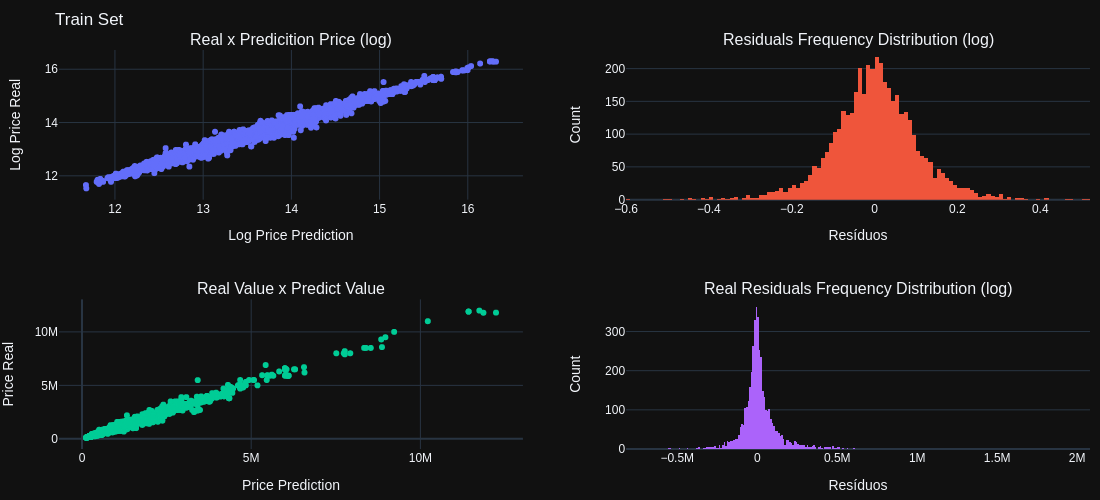

In [ ]:
residuals_plots(y_prediction_train_log, y_train, residuos_train_log, np.exp(y_prediction_train_log), np.exp(y_train), residuos_train_real, 'Train Set')

O teste de hipótese kstest vai ser repetido algumas vezes, por isso foi criada uma função para esse propósito.

In [ ]:
test_normal(residuos_train_log, alpha = 0.05, test = kstest)

The null hypothesis can be rejected. It's not a normal distribution


In [ ]:
test_normal(residuos_train_real, alpha = 0.05, test = kstest)

The null hypothesis can be rejected. It's not a normal distribution


O conjunto de treino utilizando a exponencial apresentou boas respostas nas métricas, com um R^2 = 0.9658 e RMSLE = 197555.562. Já o teste de normalidade dos resíduos, tanto em log quanto com o seu valor orignal, não passaram no teste de normalidade. Analisando os gráficos pode-se notar que há alguns outliers.

##Avaliação do modelo com o com o conjunto de teste


Finalmente foi testado o modelo com o conjunto de teste. O resultado do set ainda em log foi de R^2 = 0.89, já do dado transformado ao valor real com a exponencial foi de R^2 = 0.84.

In [ ]:
y_prediction_test = final_model.predict(X_test)
print('R2 = %s' % metrics.r2_score(y_test, y_prediction_test).round(4))

R2 = 0.8899


In [ ]:
print('R2 = %s' % metrics.r2_score(np.exp(y_test), np.exp(y_prediction_test)).round(2))
print('RMSLE = %s' % metrics.mean_squared_error(np.exp(y_test), np.exp(y_prediction_test), squared = False))

R2 = 0.84
RMSLE = 420044.7012127313


In [ ]:
residuos_log_test = y_test - y_prediction_test
residuos_reais_test = np.exp(y_test) - np.exp(y_prediction_test)

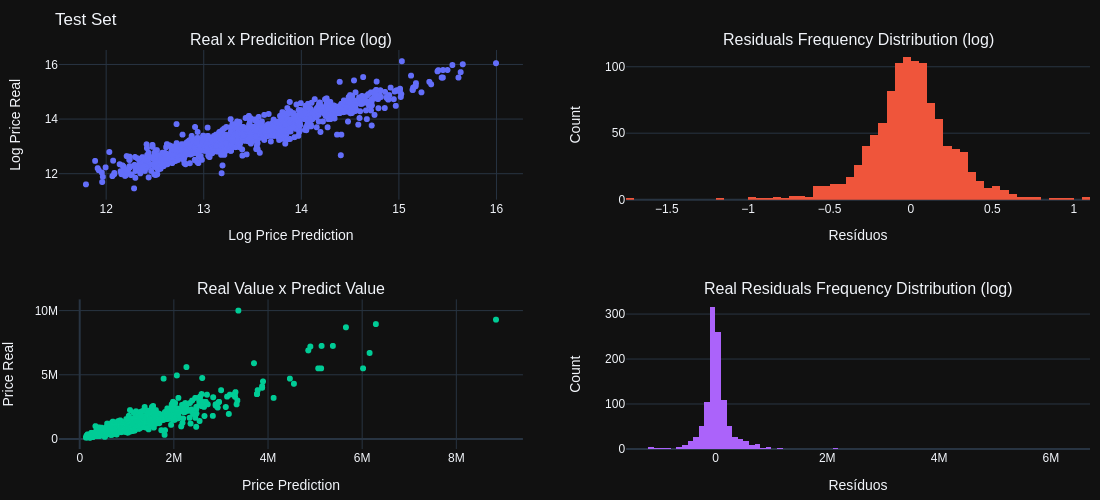

In [ ]:
residuals_plots(y_prediction_test, y_test, residuos_log_test, np.exp(y_prediction_test), np.exp(y_test), residuos_reais_test, title = 'Test Set')

Ao fazer o teste de normalidade dos resíduos, estatisticamente a curva de residuos não é normal, já que há diversos outliers com valores próximos de zero na curva.

In [ ]:
test_normal(residuos_log_test, alpha = 0.05, test = kstest)

The null hypothesis can be rejected. It's not a normal distribution


In [ ]:
test_normal(residuos_reais_test, alpha = 0.05, test = kstest)

The null hypothesis can be rejected. It's not a normal distribution


In [ ]:
df_resultados = pd.DataFrame({'Valores Reais' : np.exp(y_test), 'Valores_Previstos' : np.exp(y_prediction_test), 'Diferença' : residuos_reais_test})
df_resultados

,Valores Reais,Valores_Previstos,Diferença
2406,250000.0,3.089285e+05,-58928.511571
3182,2395000.0,2.046800e+06,348200.209472
1826,430000.0,3.717286e+05,58271.360681
597,520000.0,4.953221e+05,24677.948079
4070,690000.0,8.035924e+05,-113592.406207
...,...,...,...
1808,390000.0,4.235685e+05,-33568.468643
3263,900000.0,6.637912e+05,236208.759124
2086,270000.0,2.068358e+05,63164.181045
1426,1180000.0,1.124342e+06,55658.280554


##Análise da importância das variáveis no modelo gerado.
Observando o gráfico, a variável com maior 'peso' é a área do imóvel, seguido pelo número de vagas de garagem. Já as zonas tem pouca interferência no modelo.

In [ ]:
feature_importantecesGB = pd.Series(final_model.feature_importances_, index = X_train.columns).sort_values(ascending = False)

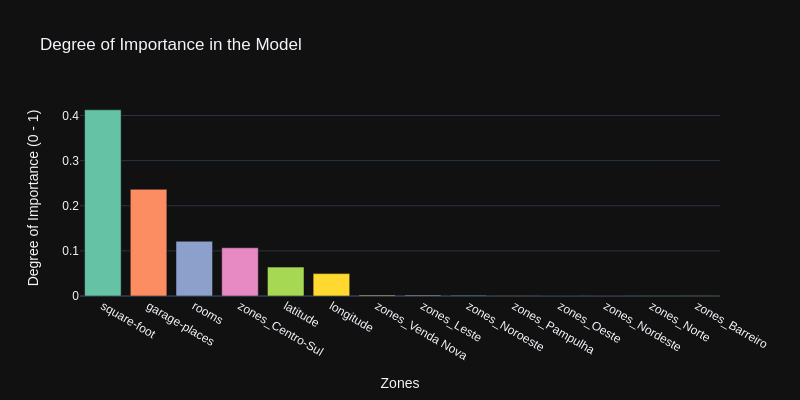

In [ ]:
fig = px.bar(feature_importantecesGB, color = feature_importantecesGB.index, color_discrete_sequence = px.colors.qualitative.Set2, title = 'Degree of Importance in the Model')
fig.update_yaxes(title_text="Degree of Importance (0 - 1)")
fig.update_xaxes(title_text="Zones")
fig.update_layout(showlegend=False, template="plotly_dark", height=400, width = 800)
fig.show('png')

##Conclusão:
Mesmo com uma base de dados com poucas informações referente a estrutura do imóvel e com uma distribuição não homogênea geograficamente, já que a Zona Centro-Sul apresenta uma base amostral de dados muito maior que as demais, considero o resultado de 0.84 de R2 um bom resultado, apesar de não ser ideal, pois o modelo não passou no teste de resíduos e apresentou alguns outliers.


Possíveis adições na base de dados como número de banheiros, quantidade de andares, presença de materiais como mármore, o ano em que o imóvel foi construído, além de uma maior amostra de dados de zonas como Barreiro e Venda Nova, poderiam melhorar consideravelmente o modelo.

Uma outra alternativa que trazer melhoria poderia ser construir um modelo de regressão direcionado a grupos de renda ou faixas de valores de imóveis, já que se trata de uma distribuição de preço bastante assimétrica.

Foi observado também a pouca interferência das regiões no modelo para prever os imóveis, sendo a única que demonstrou ter algum peso relevante no preço sendo a zona Centro-Sul (0.1). Uma futura pesquisa que tenha como objetivo entender os pesos regionais seria bastante útil para entender o comportamento dos preços.
